## Heart Disease - EDA and Feature Engineering

The data includes 303 patient level features including if they have heart disease at the end or not. Features are like;

- Age: Obvious one...
- Sex:
    - 0: Female
    - 1: Male
- Chest Pain Type: 
    - 0: Typical Angina
    - 1: Atypical Angina
    - 2: Non-Anginal Pain
    - 3: Asymptomatic
- Resting Blood Pressure: Person's resting blood pressure.
- Cholesterol: Serum Cholesterol in mg/dl  
- Fasting Blood Sugar:
    - 0:Less Than 120mg/ml
    - 1: Greater Than 120mg/ml
- Resting Electrocardiographic Measurement:
    - 0: Normal
    - 1: ST-T Wave Abnormality
    - 2: Left Ventricular Hypertrophy
- Max Heart Rate Achieved: Maximum Heart Rate Achieved
- Exercise Induced Angina:
    - 1: Yes
    - 0: No
- ST Depression: ST depression induced by exercise relative to rest.
- Slope: Slope of the peak exercise ST segment:
    - 0: Upsloping
    - 1: Flat
    - 2: Downsloping
- Thalassemia: A blood disorder called 'Thalassemia':
    - 0: Normal
    - 1: Fixed Defect
    - 2: Reversable Defect
- Number of Major Vessels: Number of major vessels colored by fluoroscopy.



In [198]:
# Loading packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from pandas_profiling import ProfileReport
import math
import random
import os
import time
# Setup

# common:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium

# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, explained_variance_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2
from sklearn.model_selection import RepeatedStratifiedKFold

# models
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier


# set some display options:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)

import warnings
warnings.filterwarnings('ignore')
from numpy import interp

# disabling warnings.

import warnings
warnings.filterwarnings('ignore') 

In [199]:
# Styling...
cust_palt = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]

plt.style.use('ggplot')

In [200]:
# Seeding:

def seed_all(seed):
    
    ''' A function to seed everything for getting stable results and reproducibility'''
    
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

seed = 42    
seed_all(seed)     

In [201]:
# Reading csv file:

train = pd.read_csv('heart.csv')

In [202]:
# Taking random samples from data.

train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [203]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [204]:
train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [205]:
# Renaming columns.
train.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar',
                 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope',
                 'num_major_vessels', 'thalassemia', 'condition']

In [206]:
train.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
condition                  0
dtype: int64

In [ ]:
ProfileReport(train, title='Pandas Profiling Report for the dataset', html={'style':{'full_width':True}})

In [ ]:
AV = AutoViz_Class()
train = AV.AutoViz('heart.csv')

In [209]:
train.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
condition                  0
dtype: int64

In [210]:
train.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            5
thalassemia                  4
condition                    2
dtype: int64

In [211]:
train.head(6)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [212]:
# Renaming cateorical data for easier understanding:

train['sex'] = train['sex'].map({0:'female',1:'male'})
train['chest_pain_type'] = train['chest_pain_type'].map({3:'asymptomatic', 1:'atypical_angina', 2:'non_anginal_pain', 0:'typical_angina'})
train['fasting_blood_sugar'] = train['fasting_blood_sugar'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})
train['rest_ecg'] = train['rest_ecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})
train['exercise_induced_angina'] = train['exercise_induced_angina'].map({0:'no',1:'yes'})
train['st_slope'] = train['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'})
train['thalassemia'] = train['thalassemia'].map({1:'fixed_defect',0:'normal',2:'reversable_defect'})
train['condition'] = train['condition'].map({0:'no_disease', 1:'has_disease'})


## Univariate Analysis

#### For this part we going to inspect how's the data distribution is and what patterns we can inspect.

In [213]:
# Masks for easier selection in future:
# Very Important
categorical = [i for i in train.loc[:,train.nunique()<=10]]
continuous = [i for i in train.loc[:,train.nunique()>=10]]

In [214]:
[i for i in train.loc[:,train.nunique()<=10]]

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'st_slope',
 'num_major_vessels',
 'thalassemia',
 'condition']

In [215]:
[i for i in train.loc[:,train.nunique()>=10]]

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression']

In [216]:
total = float(len(train[categorical]))

In [217]:
def ctg_dist(df, cols, hue,rows, columns):
    
    '''A function for displaying cateorical distribution'''
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        j.set_title(f'{str(i).capitalize()} Distribution')
        plt.tight_layout()
        total = float(len(df[i]))        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')

In [218]:
total

303.0

## Categorical Data

### Here we can do these observations:
- Males on the dataset is more than double of the female observations.
- Most common ches pain type is 'Asymptomatic' ones which is almost 50% of the data
- 85% of the patients has no high levels of fastin blood sugar.
- Resing electrocardiographic observations are evenly distributed between normal and left ventricular hypertrophy with ST-T minority
- 67% of the patients had no exercise induced angina
- Peak exercise slope seems mainly divided between upsloping and flat.

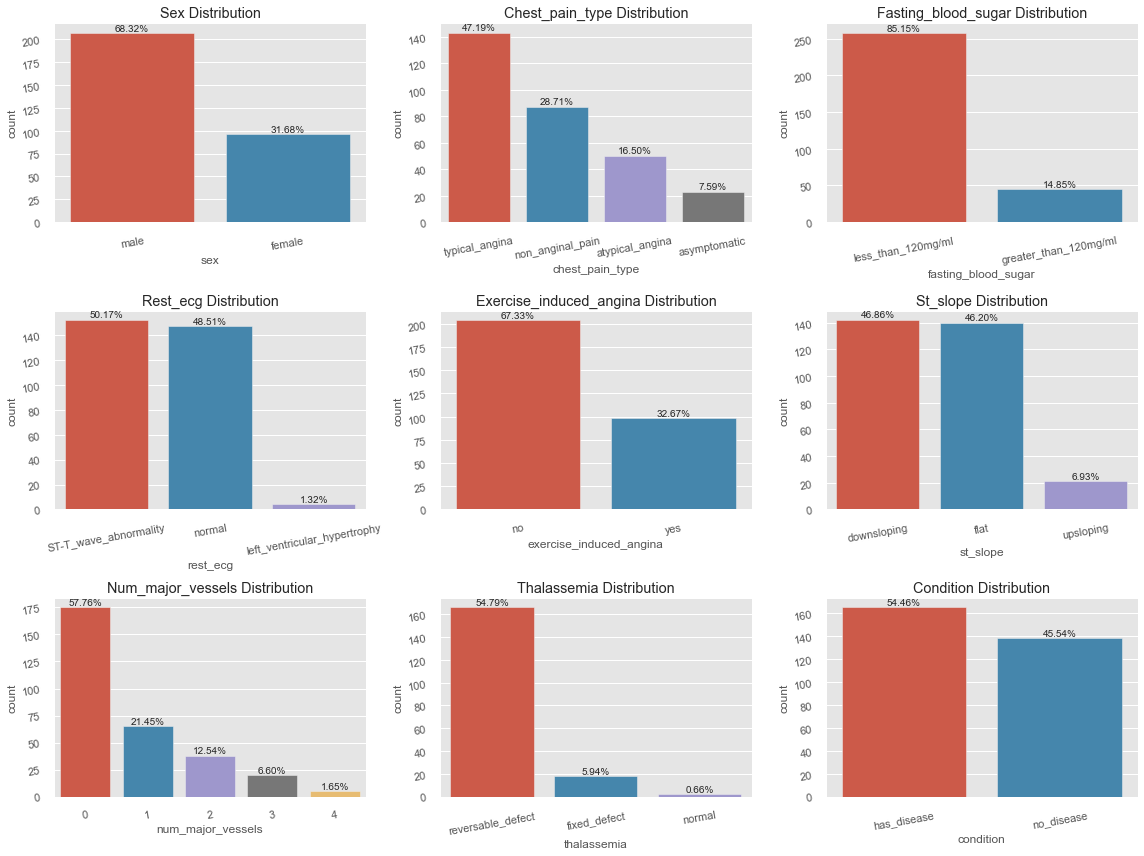

In [219]:
# Display categorical columns:

ctg_dist(train, categorical,hue=None, rows=3,columns=3)

## Numerical Data

### Most of the continuous variables somewhat close to gaussian distribution with small skews left or right except for oldpeak. Again there are some outliers espacially a strong one in Cholesterol worth to take a look later.

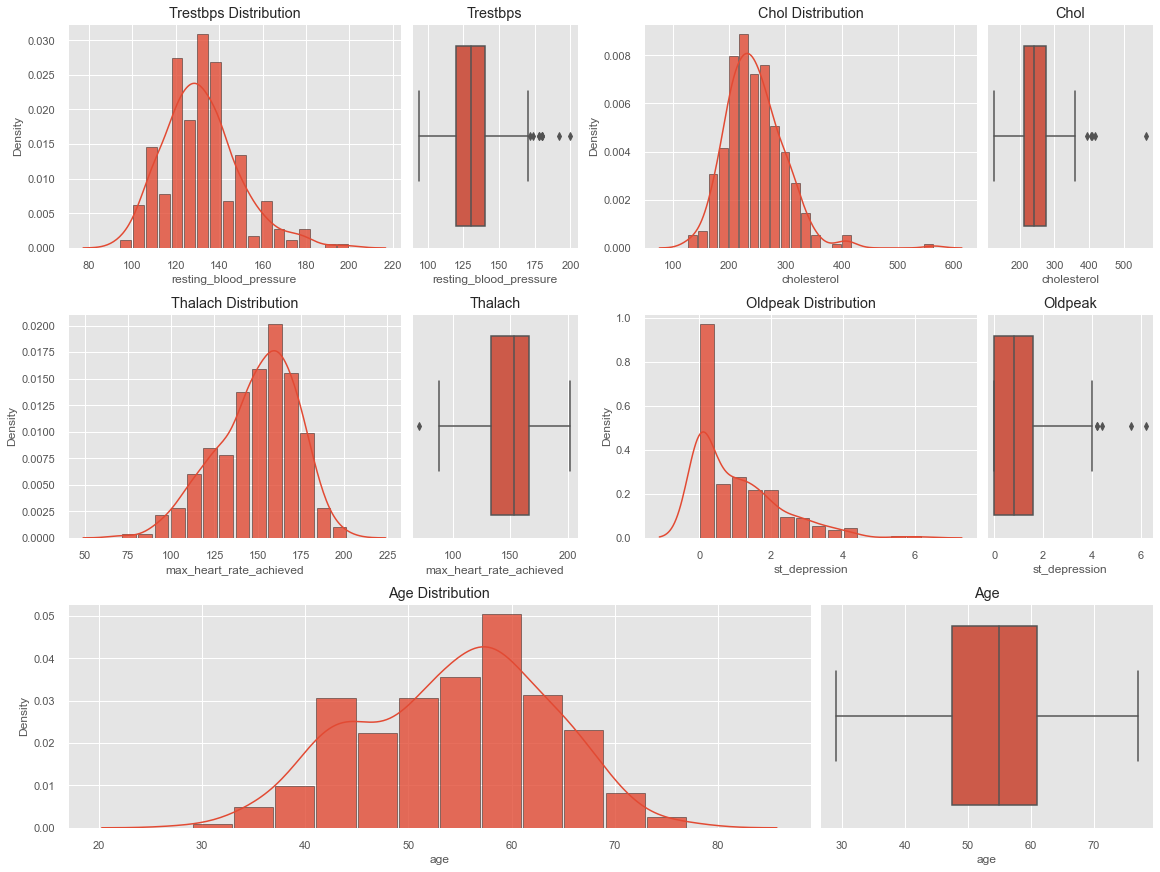

In [220]:
# Displaying numeric distribution:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('Trestbps Distribution')

sns.distplot(train[continuous[1]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8})

ax15 = fig.add_subplot(grid[0, 2:3])

ax15.set_title('Trestbps')

sns.boxplot(train[continuous[1]], orient='v')

ax2 = fig.add_subplot(grid[0, 3:5])

ax2.set_title('Chol Distribution')

sns.distplot(train[continuous[2]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8})

ax25 = fig.add_subplot(grid[0, 5:])

ax25.set_title('Chol')

sns.boxplot(train[continuous[2]], orient='v')

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('Thalach Distribution')

sns.distplot(train[continuous[3]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8})

ax35 = fig.add_subplot(grid[1, 2])

ax35.set_title('Thalach')

sns.boxplot(train[continuous[3]], orient='v')

ax4 = fig.add_subplot(grid[1, 3:5])

ax4.set_title('Oldpeak Distribution')

sns.distplot(train[continuous[4]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8})

ax45 = fig.add_subplot(grid[1, 5:])

ax45.set_title('Oldpeak')

sns.boxplot(train[continuous[4]], orient='v')

ax5 = fig.add_subplot(grid[2, :4])

ax5.set_title('Age Distribution')

sns.distplot(train[continuous[0]],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8})

ax55 = fig.add_subplot(grid[2, 4:])

ax55.set_title('Age')

sns.boxplot(train[continuous[0]], orient='h')

plt.show()


In [221]:
def ctg_dist1(df, cols,rows, columns):
    
    '''A function for displaying cateorical distribution'''
    
    fig, axes = plt.subplots(rows, columns, figsize=(20, 15))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    ax=j,
                    order=df[i].value_counts().index,
                    hue='condition')
        j.tick_params(labelrotation=10)
        j.set_title(f'{str(i).capitalize()} Distribution')
        total = float(len(df[i]))        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        plt.tight_layout()

# Bivariate Analysis
## Categorical Data vs Target

### Here we can do these observations:

- Males are much more likely for heart diseases.
- Chest pain type is very subjective and has no direct relation on the outcome, asymptomatic chest pains having highest disease outcome.
- Blood sugar has no direct effect on the disease.
- Rest ECG results showing no direct results but having normal ECG is pretty good sign. Even though it's pretty rare in the data, if you ST-T wave abnormality you are 3 times more likely to have heart disease.
- Having exercise induced angina is pretty strong indicator for heart disease, patients are almost 3 times more likely to have disease if they have exercise induced angina. Meanwhile it's less than half for not having it.
- Patients who had flat slope distribution are more likely to have disease.
- Number of major vessels observed seems on similar levels for patients who have disease but 0 observations is good sign for not having disease.
- Having defected thalium test results is pretty strong indicator for heart disease.

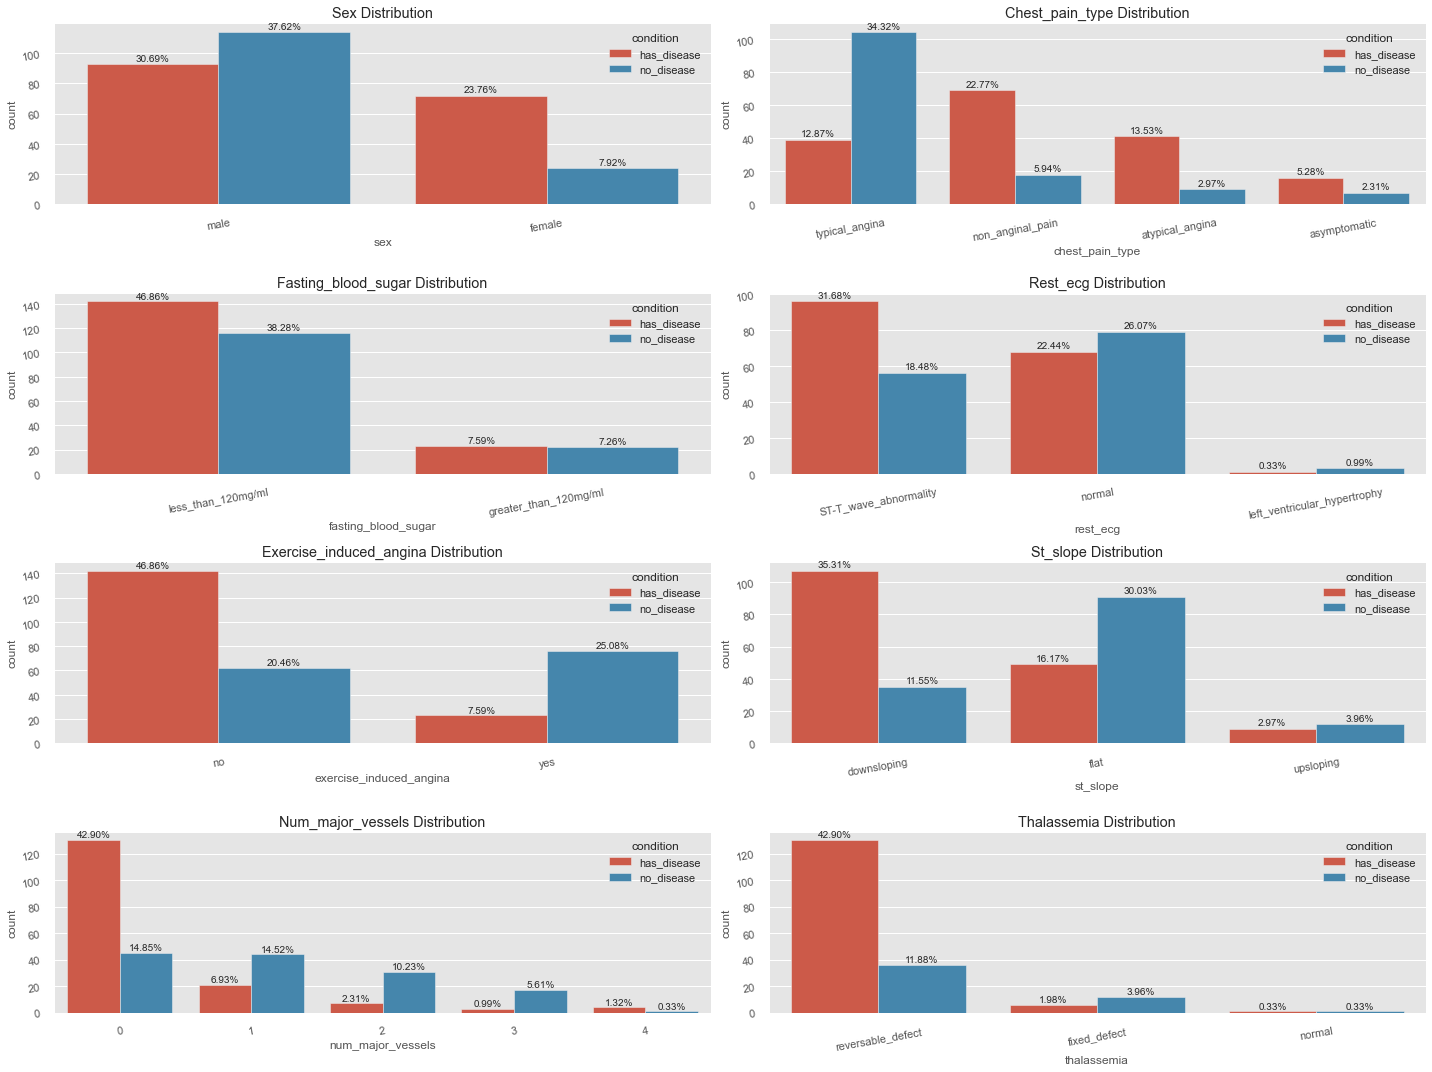

In [222]:
ctg_dist1(train,categorical,4,2)

## Numerical Data vs Target

### Here we can do these observations:

- Having higher resting blood pressure shows you are little bit more likely to have heart disease.
- Again same for Cholesterol, it's not strong indicator but patients are little bit more likely to have disease with high cholesterol. There's is also one outlier there with no disease, pretty interesting.
- I find max heart rate distribution a bit interesting, expecting the other way around but it might be due to testing conditions and if you have normal results on ECG while exercising instructors might be increasing your excercise density?
- It's pretty clear that heart disease likelihood increases with ST depression levels...
- Lastly older patients are more likely to have heart disease.

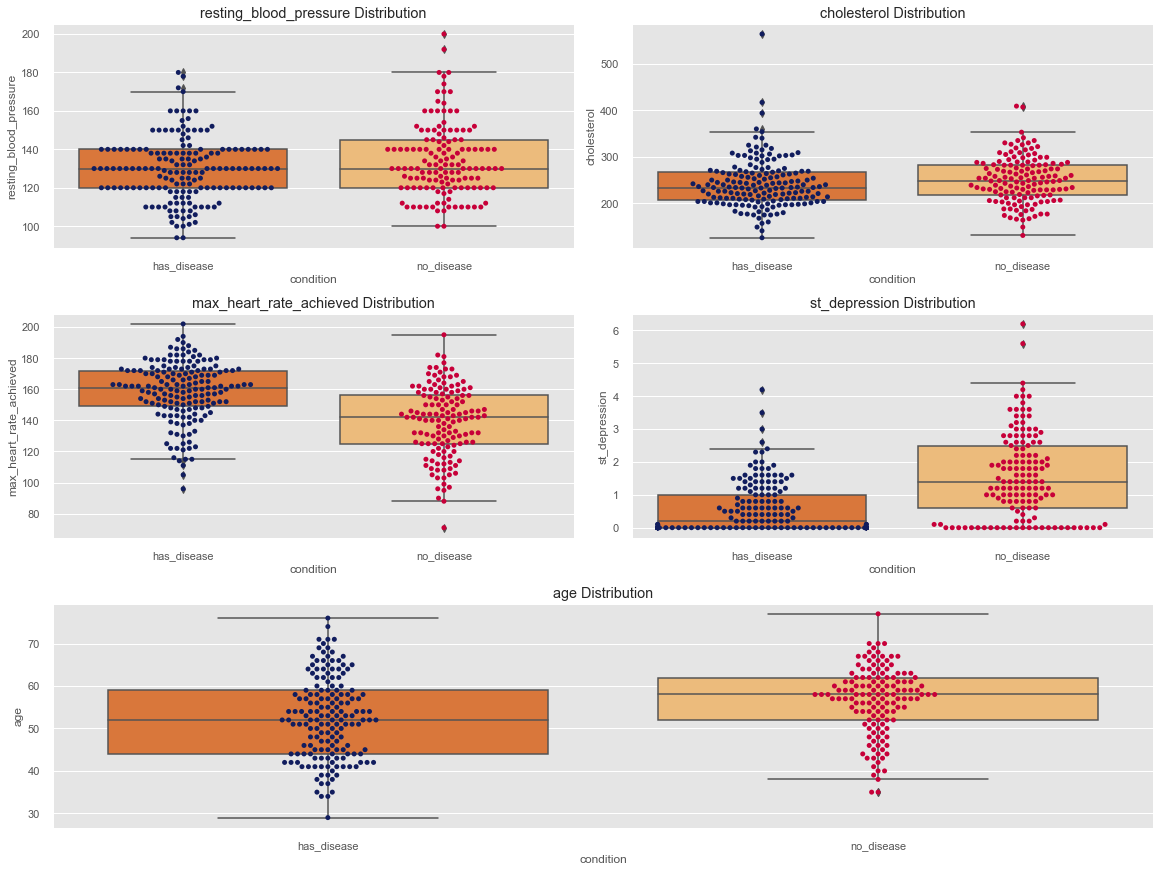

In [223]:
# Displaying numeric distribution vs condition:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('resting_blood_pressure Distribution')

sns.boxplot(x='condition',
                    y='resting_blood_pressure',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax1)
sns.swarmplot(x='condition',
                    y='resting_blood_pressure',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax1)

ax2 = fig.add_subplot(grid[0, 2:])

ax2.set_title('cholesterol Distribution')

sns.boxplot(x='condition',
                    y='cholesterol',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax2)
sns.swarmplot(x='condition',
                    y='cholesterol',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax2)

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('max_heart_rate_achieved Distribution')

sns.boxplot(x='condition',
                    y='max_heart_rate_achieved',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax3)
sns.swarmplot(x='condition',
                    y='max_heart_rate_achieved',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax3)

ax4 = fig.add_subplot(grid[1, 2:])

ax4.set_title('st_depression Distribution')

sns.boxplot(x='condition',
                    y='st_depression',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax4)
sns.swarmplot(x='condition',
                    y='st_depression',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax4)

ax5 = fig.add_subplot(grid[2, :])

ax5.set_title('age Distribution')

sns.boxplot(x='condition',
                    y='age',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax5)
sns.swarmplot(x='condition',
                    y='age',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax5)
plt.show()

# Multivariate Analysis

<Figure size 1152x720 with 0 Axes>

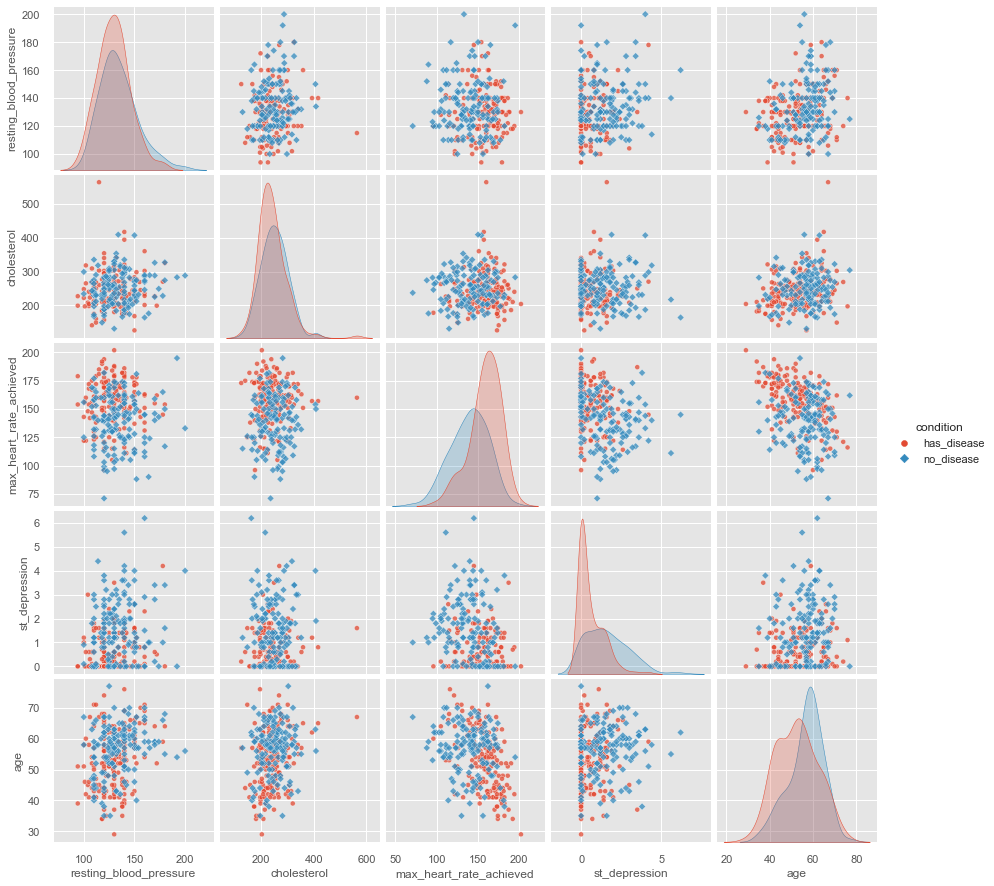

In [224]:
# Numeric data vs each other and condition:

plt.figure(figsize=(16, 10))
sns.pairplot(train[['resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','age', 'condition']], hue='condition',
           markers=['o','D'], plot_kws=dict(s=25, alpha=0.75, ci=None)
            )

plt.show()

In [225]:
# 3D scatterplot of numeric data:

fig = px.scatter_3d(train, x='cholesterol', y='max_heart_rate_achieved', z='age', size='st_depression',
              color='condition', opacity=0.8)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Correlations

In [226]:
corr_train = pd.read_csv('heart.csv')
full_data = train

In [227]:
corr_train.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar',
                 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope',
                 'num_major_vessels', 'thalassemia', 'condition']

Text(0.5, 1.0, 'Correlation Matrix Spearman Method- Categorical Data ')

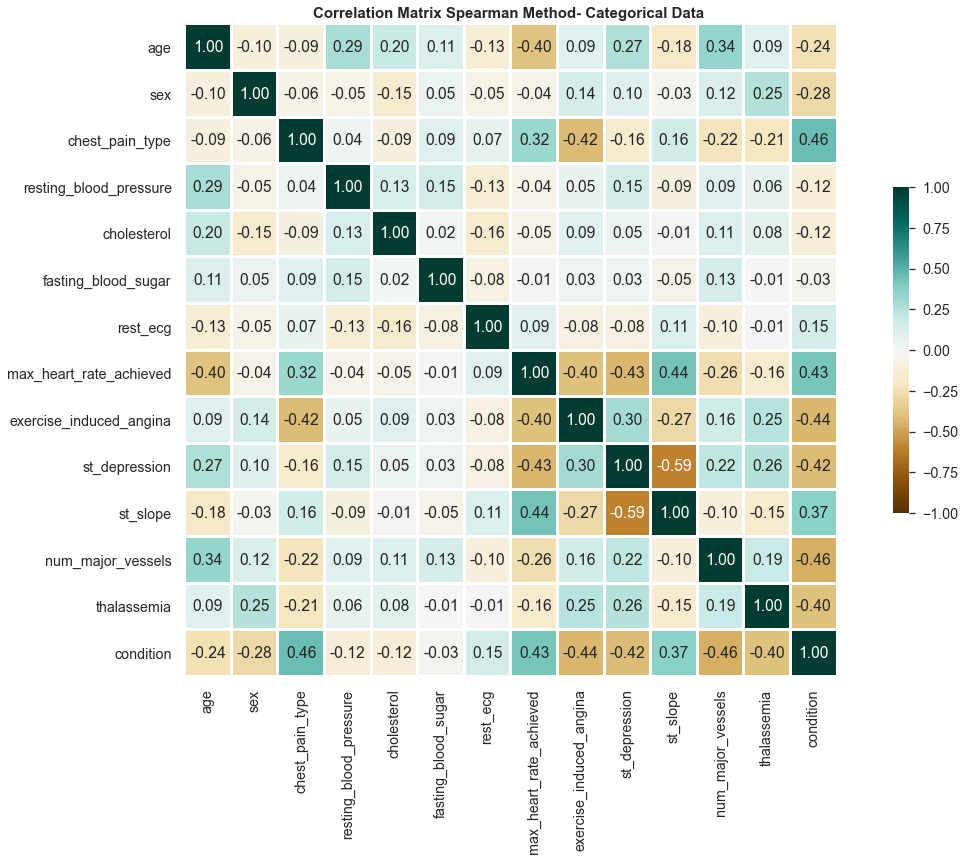

In [228]:
sns.set(font_scale=1.3)
corr_categorical=corr_train.corr(method='spearman')
mask_categorical = np.triu(np.ones_like(corr_categorical, dtype=np.bool))
plt.figure(figsize=(20, 12))
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(14, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')


Text(0.5, 1.0, 'Correlation Matrix Spearman Method- Categorical Data ')

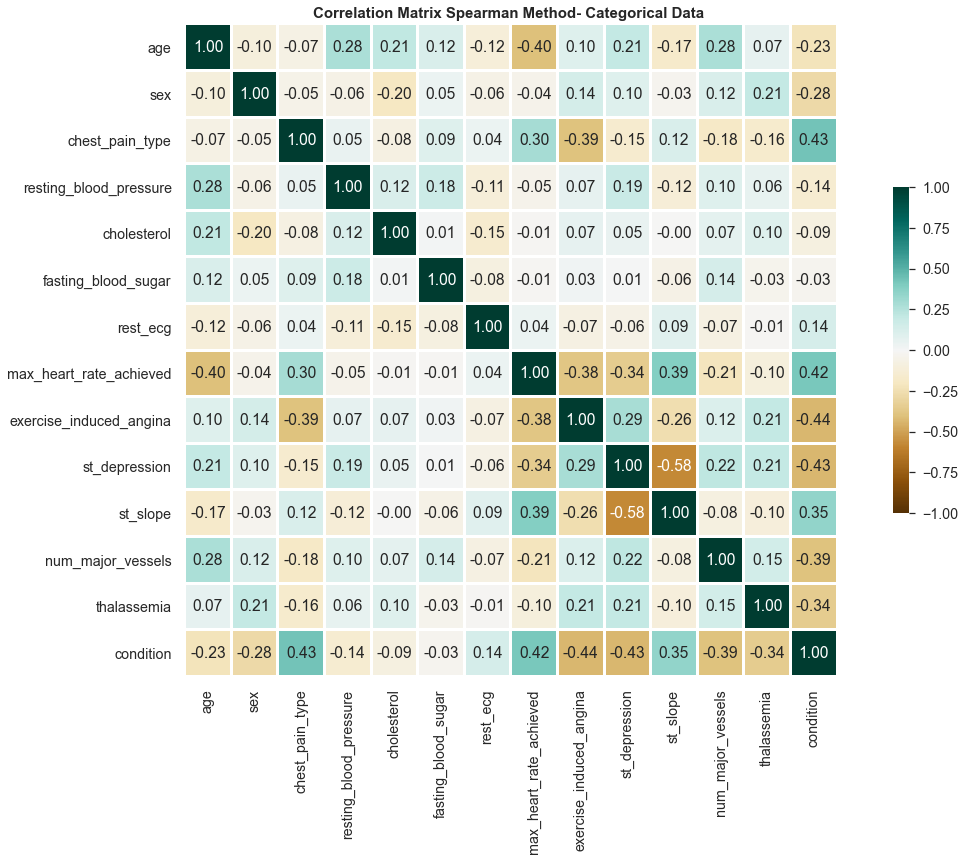

In [229]:
sns.set(font_scale=1.3)
corr_categorical=corr_train.corr(method='pearson')
mask_categorical = np.triu(np.ones_like(corr_categorical, dtype=np.bool))
plt.figure(figsize=(20, 12))
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(14, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')


[Text(0.5, 0, 'Correlation'), Text(0, 0.5, 'Parameter')]

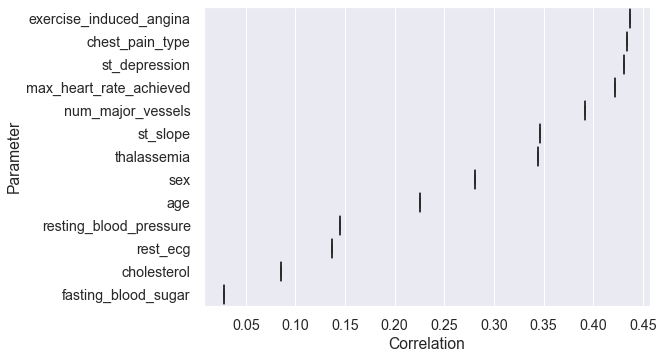

In [230]:
correlations = corr_train.corrwith(corr_train['condition']).iloc[:-1].to_frame()
correlations[0] = correlations[0].abs()
correlations.sort_values(by=0, inplace=True, ascending=False)
labels = correlations.index
ax = sns.boxplot(x=0,y=labels, data=correlations, palette = 'pink')
ax.set_yticklabels(labels)
ax.set(xlabel='Correlation', ylabel='Parameter')

## Feature Engineering

In [231]:
data = pd.read_csv('heart.csv')

In [232]:
def fe_creation(df):
    df['age2'] = df['age']//10
    df['trestbps2'] = df['trestbps']//10
    df['chol2'] = df['chol']//40
    df['thalach2'] = df['thalach']//40
    df['oldpeak2'] = df['oldpeak']//0.4
    for i in ['sex', 'age2', 'fbs', 'restecg', 'exang','thal', ]:
        for j in ['cp','trestbps2', 'chol2', 'thalach2', 'oldpeak2', 'slope', 'ca']:
            df[i + "_" + j] = df[i].astype('str') + "_" + df[j].astype('str')
    return df

data = fe_creation(data)

In [233]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age2',
       'trestbps2', 'chol2', 'thalach2', 'oldpeak2', 'sex_cp', 'sex_trestbps2',
       'sex_chol2', 'sex_thalach2', 'sex_oldpeak2', 'sex_slope', 'sex_ca',
       'age2_cp', 'age2_trestbps2', 'age2_chol2', 'age2_thalach2',
       'age2_oldpeak2', 'age2_slope', 'age2_ca', 'fbs_cp', 'fbs_trestbps2',
       'fbs_chol2', 'fbs_thalach2', 'fbs_oldpeak2', 'fbs_slope', 'fbs_ca',
       'restecg_cp', 'restecg_trestbps2', 'restecg_chol2', 'restecg_thalach2',
       'restecg_oldpeak2', 'restecg_slope', 'restecg_ca', 'exang_cp',
       'exang_trestbps2', 'exang_chol2', 'exang_thalach2', 'exang_oldpeak2',
       'exang_slope', 'exang_ca', 'thal_cp', 'thal_trestbps2', 'thal_chol2',
       'thal_thalach2', 'thal_oldpeak2', 'thal_slope', 'thal_ca'],
      dtype='object')

In [234]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age2,trestbps2,chol2,thalach2,...,restecg_thalach2,restecg_oldpeak2,restecg_slope,restecg_ca,exang_cp,exang_trestbps2,exang_chol2,exang_thalach2,exang_oldpeak2,exang_slope,exang_ca,thal_cp,thal_trestbps2,thal_chol2,thal_thalach2,thal_oldpeak2,thal_slope,thal_ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,6,14,5,3,...,0_3,0_5.0,0_0,0_0,0_3,0_14,0_5,0_3,0_5.0,0_0,0_0,1_3,1_14,1_5,1_3,1_5.0,1_0,1_0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3,13,6,4,...,1_4,1_8.0,1_0,1_0,0_2,0_13,0_6,0_4,0_8.0,0_0,0_0,2_2,2_13,2_6,2_4,2_8.0,2_0,2_0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4,13,5,4,...,0_4,0_3.0,0_2,0_0,0_1,0_13,0_5,0_4,0_3.0,0_2,0_0,2_1,2_13,2_5,2_4,2_3.0,2_2,2_0


In [235]:
categorical_columns = {'sex_cp', 'sex_trestbps2',
       'sex_chol2', 'sex_thalach2', 'sex_oldpeak2', 'sex_slope', 'sex_ca',
       'age2_cp', 'age2_trestbps2', 'age2_chol2', 'age2_thalach2',
       'age2_oldpeak2', 'age2_slope', 'age2_ca', 'fbs_cp', 'fbs_trestbps2',
       'fbs_chol2', 'fbs_thalach2', 'fbs_oldpeak2', 'fbs_slope', 'fbs_ca',
       'restecg_cp', 'restecg_trestbps2', 'restecg_chol2', 'restecg_thalach2',
       'restecg_oldpeak2', 'restecg_slope', 'restecg_ca', 'exang_cp',
       'exang_trestbps2', 'exang_chol2', 'exang_thalach2', 'exang_oldpeak2',
       'exang_slope', 'exang_ca', 'thal_cp', 'thal_trestbps2', 'thal_chol2',
       'thal_thalach2', 'thal_oldpeak2', 'thal_slope', 'thal_ca'}

In [236]:
#Label Encoding the Categorical Columns
for col in categorical_columns:
      le = LabelEncoder()
      le.fit(list(data[col].astype(str).values))
      data[col] = le.transform(list(data[col].astype(str).values))

In [237]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age2,trestbps2,chol2,thalach2,...,restecg_thalach2,restecg_oldpeak2,restecg_slope,restecg_ca,exang_cp,exang_trestbps2,exang_chol2,exang_thalach2,exang_oldpeak2,exang_slope,exang_ca,thal_cp,thal_trestbps2,thal_chol2,thal_thalach2,thal_oldpeak2,thal_slope,thal_ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,6,14,5,3,...,1,7,0,0,3,4,4,2,8,0,0,5,4,2,3,8,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3,13,6,4,...,7,22,3,5,2,3,5,3,11,0,0,8,11,9,8,18,5,5
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4,13,5,4,...,2,5,2,0,1,3,4,3,6,2,0,7,11,8,8,13,7,5


### Feature Selection

In [238]:
train = data.copy()
target = train.pop('target')
train.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age2,trestbps2,chol2,thalach2,oldpeak2,...,restecg_thalach2,restecg_oldpeak2,restecg_slope,restecg_ca,exang_cp,exang_trestbps2,exang_chol2,exang_thalach2,exang_oldpeak2,exang_slope,exang_ca,thal_cp,thal_trestbps2,thal_chol2,thal_thalach2,thal_oldpeak2,thal_slope,thal_ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,6,14,5,3,5.0,...,1,7,0,0,3,4,4,2,8,0,0,5,4,2,3,8,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,3,13,6,4,8.0,...,7,22,3,5,2,3,5,3,11,0,0,8,11,9,8,18,5,5


In [239]:
num_features_opt = 25   # the number of features that we need to choose as a result
num_features_max = 35   # the somewhat excessive number of features, which we will choose at each stage
features_best = []

In [240]:
#FS by the SelectFromModel with LinearSVC 
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(train, target)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

In [241]:
#FS by the SelectFromModel with Lasso
lasso = LassoCV(cv=3).fit(train, target)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

In [242]:
#FS by the SelectKBest with Chi-2
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(train, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
featureScores = featureScores.sort_values(by='Score', ascending=False)
features_best.append(featureScores['Feature'].to_list())

In [243]:
#FS by the Recursive Feature Elimination (RFE) with Logistic Regression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features_max, step=10, verbose=5)
rfe_selector.fit(train, target)
rfe_support = rfe_selector.get_support()
rfe_feature = train.loc[:,rfe_support].columns.tolist()
features_best.append(rfe_feature)

Fitting estimator with 60 features.
Fitting estimator with 50 features.
Fitting estimator with 40 features.


In [244]:
#FS by the VarianceThreshold
selector = VarianceThreshold(threshold=10)
np.shape(selector.fit_transform(data))
features_best.append(list(np.array(data.columns)[selector.get_support(indices=False)]))

In [245]:
features_best

[['age',
  'trestbps',
  'chol',
  'thalach',
  'ca',
  'sex_oldpeak2',
  'sex_ca',
  'age2_cp',
  'age2_ca',
  'fbs_cp',
  'restecg_cp',
  'exang_ca',
  'thal_cp',
  'thal_chol2',
  'thal_oldpeak2',
  'thal_slope'],
 ['age',
  'trestbps',
  'chol',
  'thalach',
  'sex_oldpeak2',
  'sex_ca',
  'age2_cp',
  'age2_oldpeak2',
  'age2_ca',
  'fbs_trestbps2',
  'restecg_trestbps2',
  'exang_ca',
  'thal_cp',
  'thal_chol2',
  'thal_oldpeak2',
  'thal_slope'],
 ['exang_oldpeak2',
  'exang_ca',
  'sex_oldpeak2',
  'thal_oldpeak2',
  'exang_trestbps2',
  'thalach',
  'oldpeak2',
  'fbs_oldpeak2',
  'age2_oldpeak2',
  'exang_chol2',
  'thal_trestbps2',
  'thal_chol2',
  'thal_ca',
  'sex_trestbps2',
  'sex_ca',
  'oldpeak',
  'ca',
  'cp',
  'age2_ca',
  'age2_trestbps2',
  'restecg_cp',
  'fbs_ca',
  'exang',
  'age2_chol2',
  'sex_chol2',
  'fbs_cp',
  'restecg_thalach2',
  'exang_thalach2',
  'chol',
  'age',
  'exang_slope',
  'restecg_slope',
  'exang_cp',
  'trestbps',
  'restecg_trestbps

In [246]:
# Most common items in all lists of optimal features
main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in data.columns.tolist()}
for i in range(len(features_best)):
  for feature_name in features_best[i]:
        main_cols_opt[feature_name] += 1
df_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Num'])
df_main_cols_opt.sort_values(by=['Num'], ascending=False)

,Num
sex_oldpeak2,5
thal_oldpeak2,5
thal_chol2,5
age2_ca,5
age2_cp,5
...,...
restecg_thalach2,1
sex,1
oldpeak,1
exang,1


In [247]:
main_cols = df_main_cols_opt.nlargest(num_features_opt, 'Num').index.tolist()

In [248]:
len(main_cols)

25

## ML Prediction

In [249]:
X = train[main_cols]
y = target

In [250]:
# define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]
# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:
kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

for name, model in base_models:   
    # get cross validation score for each model:
    cv_results = cross_val_score(model, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    # output:
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}, ")

DT_model cross validation accuarcy score: 0.7758 +/- 0.0467 (std) min: 0.7105, max: 0.84, 
RF_model cross validation accuarcy score: 0.8021 +/- 0.0201 (std) min: 0.7763, max: 0.8267, 
LR_model cross validation accuarcy score: 0.8351 +/- 0.0476 (std) min: 0.7763, max: 0.8947, 
XGB_model cross validation accuarcy score: 0.8021 +/- 0.0178 (std) min: 0.7763, max: 0.8267, 


Logistic Regression Model gives the best accuracy at 83.51% 

In [251]:
#HyperParameterTuning for LR Model 
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01, 101, 99, 102, 98]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.840753 using {'C': 99, 'penalty': 'l2', 'solver': 'lbfgs'}
0.819928 (0.089575) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.837491 (0.080724) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.821004 (0.088823) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.825448 (0.090692) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.836416 (0.077075) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.825448 (0.089096) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.830968 (0.086010) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.835341 (0.084117) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.833118 (0.086204) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.830860 (0.082494) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.833047 (0.084278) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.834194 (0.084904) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.824265 (0.080464) with: {'

As we can se, after Hyper Parameter tuning of LogisticRegression we get accuracy of 84.07% 